<a href="https://colab.research.google.com/github/jjfantini/humblBlogTutorials/blob/master/Py/LSTM_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import dependencies
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from pandas_datareader import DataReader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, LSTM
import yfinance as yf

## Step 1: Data Preparation

In [2]:
# Get the stock quote for the past 10 years
stock = input("Enter a stock ticker: ")
num_of_years = 10
start_date = datetime.datetime.now() - datetime.timedelta(days=int(365.25*num_of_years))
end_date = datetime.date.today()

df = yf.download(tickers = stock, start=start_date, end=end_date)
data = df.filter(['Close'])
dataset = data.values
train_data_len = math.ceil(len(dataset)*.8)

Enter a stock ticker: AAPL
[*********************100%%**********************]  1 of 1 completed


In [3]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [4]:
# Create the training dataset
train_data = scaled_data[0:train_data_len, :]

In [5]:
# Split the data into x_train and y_train datasets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to 3 dimensions
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


## Step 2: Build the LSTM Model

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

## Step 3: Train the Model

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

## Step 4: Generate Predictions and Evaluate Model



In [ ]:
# Create test dataset
test_data = scaled_data[train_data_len-60:, :]

# Create x_test, y_test datasets
x_test = []
y_test = dataset[train_data_len:, :]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert data to numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions-y_test)**2))

## Step 5: Visualization of Model Prediction

<ipython-input-9-ebc4c39cae3c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


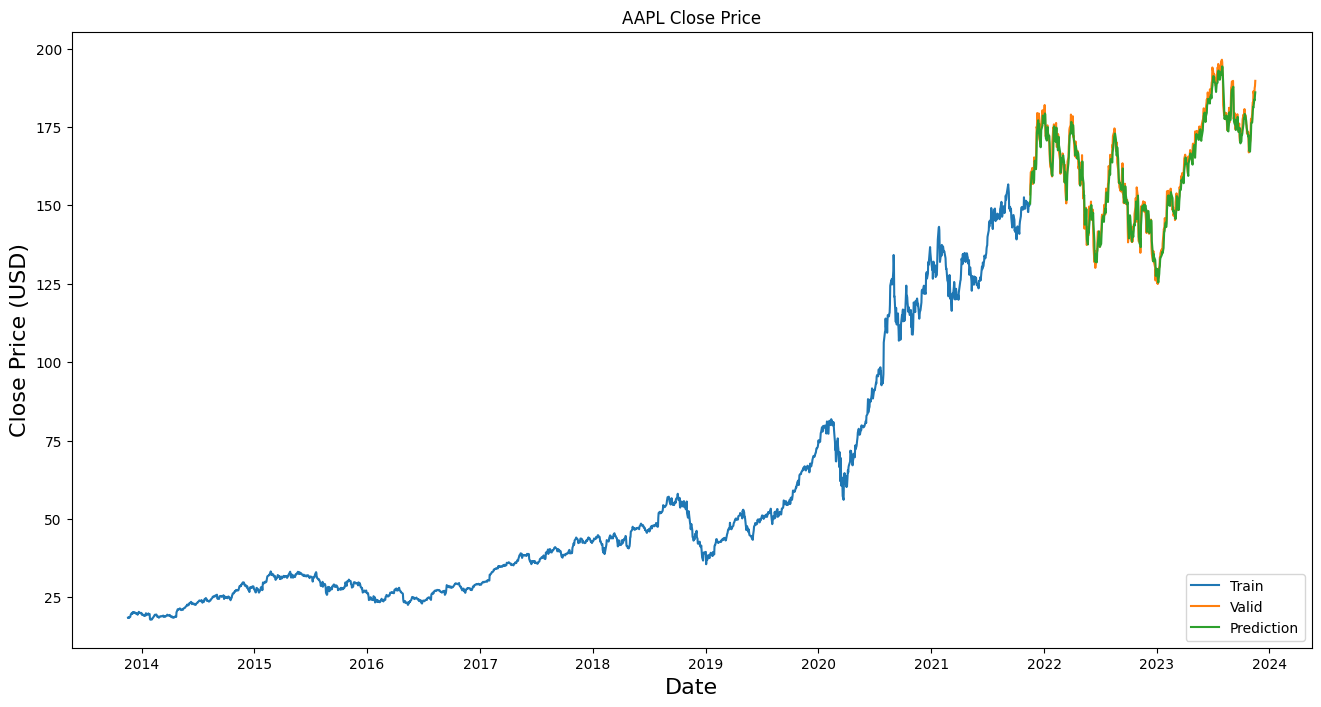

1/1 [==============================] - 0s 32ms/step
The predicted price for the next trading day is: 187.47999572753906
The root mean squared error is 3.19
Testing Mean Squared Error: 10.190


In [9]:
# Plot the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title(f"{stock.upper()} Close Price")
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price (USD)', fontsize=16)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Valid','Prediction'],loc='lower right')
plt.show()

# Get predicted price for next day
last_60day = data[-60:].values
last_60day_scaled = scaler.transform(last_60day)
xx_test = []
xx_test.append(last_60day_scaled)
xx_test = np.array(xx_test)
xx_test = np.reshape(xx_test, (xx_test.shape[0], xx_test.shape[1],1))
pred = model.predict(xx_test)
pred = scaler.inverse_transform(pred)
pred = pred[0]
pred = pred[0]
print("The predicted price for the next trading day is: {}".format(round(pred, 2)))

# Root mean squared error
print (f'The root mean squared error is {round(rmse, 2)}')

# Mean squared error
error = mean_squared_error(valid['Close'].tolist(), valid['Predictions'].tolist())
print('Testing Mean Squared Error: %.3f' % error)